<a href="https://colab.research.google.com/github/albernazz/Cats-vs-dogs-rede-neural/blob/main/Cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!rm -rf catsxdogs

In [ ]:
!git clone https://github.com/cunhamaicon/catsxdogs

fatal: destination path 'catsxdogs' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf # Import TensorFlow
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D # Use tf.keras
from tensorflow.keras.applications import MobileNet # Use tf.keras
from tensorflow.keras.preprocessing import image # Use tf.keras
from tensorflow.keras.applications.mobilenet import preprocess_input # Use tf.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Use tf.keras
from tensorflow.keras.models import Model # Use tf.keras
from tensorflow.keras.optimizers import Adam # Use tf.keras
from tensorflow.keras.layers import Dropout # Use tf.keras

In [ ]:
model=MobileNet(weights='imagenet',include_top=False)


<ipython-input-38-43901aabfbda>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model=MobileNet(weights='imagenet',include_top=False)


In [ ]:
x=model.output
x=GlobalAveragePooling2D()(x)

In [ ]:
x=Dense(50,activation='relu')(x)
preds=Dense(1,activation='sigmoid')(x)
model=Model(inputs=model.input,outputs=preds)

In [ ]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_layer_1
1 conv1
2 conv1_bn
3 conv1_relu
4 conv_dw_1
5 conv_dw_1_bn
6 conv_dw_1_relu
7 conv_pw_1
8 conv_pw_1_bn
9 conv_pw_1_relu
10 conv_pad_2
11 conv_dw_2
12 conv_dw_2_bn
13 conv_dw_2_relu
14 conv_pw_2
15 conv_pw_2_bn
16 conv_pw_2_relu
17 conv_dw_3
18 conv_dw_3_bn
19 conv_dw_3_relu
20 conv_pw_3
21 conv_pw_3_bn
22 conv_pw_3_relu
23 conv_pad_4
24 conv_dw_4
25 conv_dw_4_bn
26 conv_dw_4_relu
27 conv_pw_4
28 conv_pw_4_bn
29 conv_pw_4_relu
30 conv_dw_5
31 conv_dw_5_bn
32 conv_dw_5_relu
33 conv_pw_5
34 conv_pw_5_bn
35 conv_pw_5_relu
36 conv_pad_6
37 conv_dw_6
38 conv_dw_6_bn
39 conv_dw_6_relu
40 conv_pw_6
41 conv_pw_6_bn
42 conv_pw_6_relu
43 conv_dw_7
44 conv_dw_7_bn
45 conv_dw_7_relu
46 conv_pw_7
47 conv_pw_7_bn
48 conv_pw_7_relu
49 conv_dw_8
50 conv_dw_8_bn
51 conv_dw_8_relu
52 conv_pw_8
53 conv_pw_8_bn
54 conv_pw_8_relu
55 conv_dw_9
56 conv_dw_9_bn
57 conv_dw_9_relu
58 conv_pw_9
59 conv_pw_9_bn
60 conv_pw_9_relu
61 conv_dw_10
62 conv_dw_10_bn
63 conv_dw_10_relu
64 conv_pw_10
65 con

In [ ]:
for layer in model.layers[:88]:
    layer.trainable=False
for layer in model.layers[88:]:
    layer.trainable=True

In [ ]:
batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.4,
                                   zoom_range = 0.4,
                                   height_shift_range=0.3,
                                   width_shift_range=0.3,
                                   rotation_range=50,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('catsxdogs/training_set',
                                                 target_size = (224, 224),
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('catsxdogs/test_set',
                                            target_size = (224, 224),
                                            batch_size = batch_size,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(training_set,
                    steps_per_epoch=8000 // batch_size,  # Use // for integer division
                    epochs=10,
                    validation_data=test_set,
                    validation_steps=2000 // batch_size)  # Use // for integer division

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 567s 2s/step - accuracy: 0.5058 - loss: 0.8191 - val_accuracy: 0.5176 - val_loss: 0.7652
Epoch 2/10


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.7343
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 555s 2s/step - accuracy: 0.5145 - loss: 0.7678 - val_accuracy: 0.5358 - val_loss: 0.7335
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.7758
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 560s 2s/step - accuracy: 0.5237 - loss: 0.7461 - val_accuracy: 0.5559 - val_loss: 0.7060
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.6671
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 557s 2s/step - accuracy: 0.5439 - loss: 0.7237 - val_accuracy: 0.5867 - val_loss: 0.6793
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.6534
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 558s 2s/step - accuracy: 0.5642 - loss: 

In [ ]:
model.save('catsxdogs_mobilenet.h5')
from google.colab import files
files.download('catsxdogs_mobilenet.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
ls catsxdogs/single_prediction

cat_or_dog_1.jpg  cat_or_dog_2.jpg  chino1.jpg  floyd1.jpg  floyd2.jpg  floyd3.jpg  floyd4.jpg


In [ ]:
test_image = image.load_img('catsxdogs/single_prediction/chino1.jpg', target_size = (224, 224))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
test_image = test_image/255

In [ ]:
result = model.predict(test_image)

if result[0][0] > 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step
cat


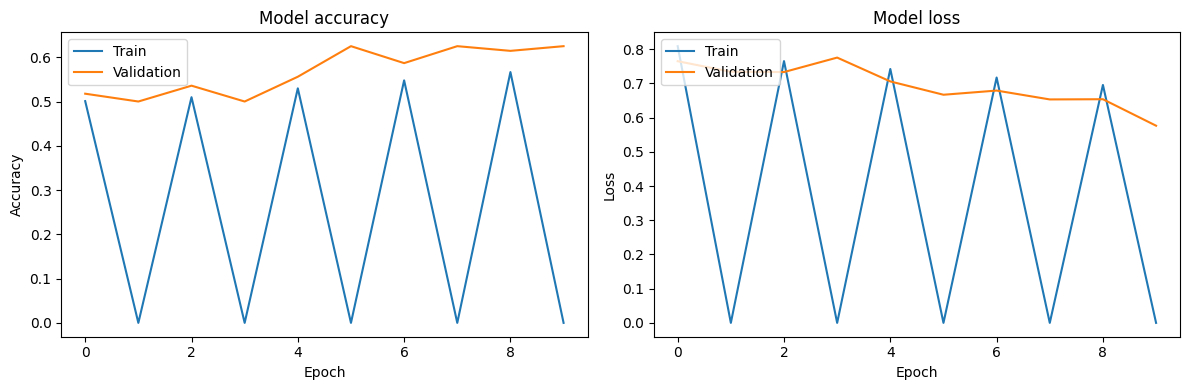

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))  # Adjust figure size if needed

plt.subplot(1, 2, 1)  # Create a subplot for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)  # Create a subplot for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

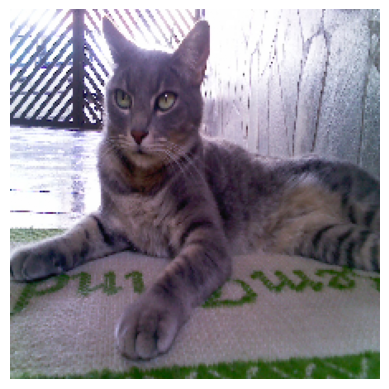

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(test_image[0])  # Exibe a primeira imagem do lote
plt.axis('off')  # Remover os eixos
plt.show()

In [ ]:
result = model.predict(test_image)

if result[0][0] > 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
cat


In [ ]:
model.save('catvsdog.h5')